In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd
import seaborn as sns

## LGBMRegressor & XGBRegressor

In [2]:
metric = "F1-Score"

### Look Back Window Size & Lags

LookBackWindowSize
65      48
260     49
520     50
780     51
1300    54
Name: F1-Score, dtype: int64


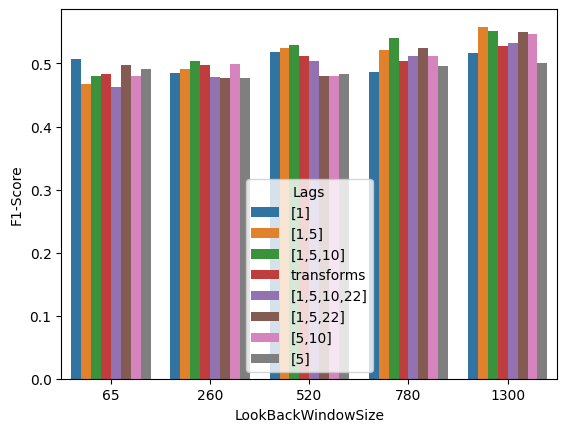

In [3]:
lgbm = pd.read_csv("../results/tuning/LGBMRegressor_lbws.csv", sep=";")
print(round(lgbm.groupby("LookBackWindowSize")[metric].mean()*100).astype(int))
sns.barplot(x="LookBackWindowSize", y=metric, hue="Lags", data=lgbm);

LookBackWindowSize
65      49
260     49
520     50
780     51
1300    51
Name: F1-Score, dtype: int64


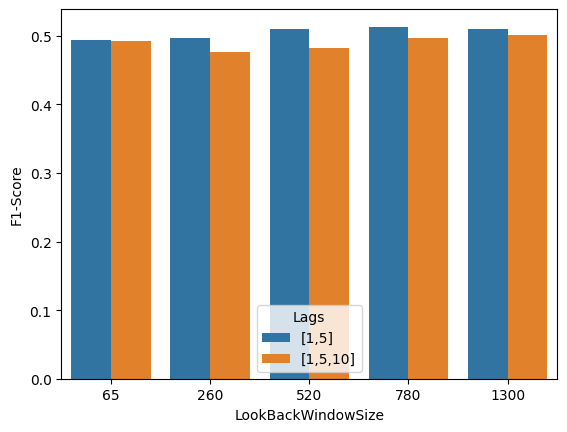

In [4]:
xgb = pd.read_csv("../results/tuning/XGBRegressor_lbws.csv", sep=";")
print(round(xgb.groupby("LookBackWindowSize")[metric].mean()*100).astype(int))
sns.barplot(x="LookBackWindowSize", y=metric, hue="Lags", data=xgb);

### Boosting Type

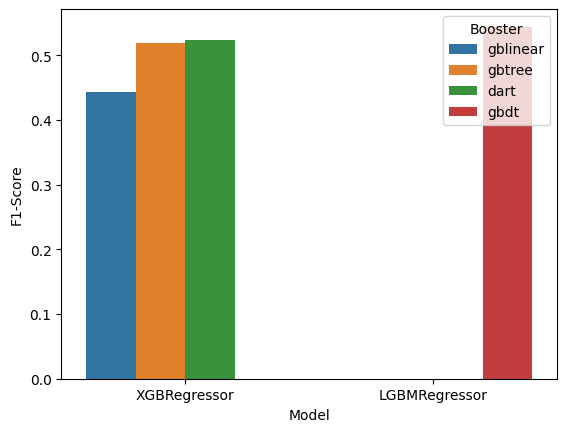

In [5]:
bt = pd.read_csv("../results/tuning/boosting_type.csv", sep=";")
sns.barplot(x="Model", y=metric, hue="Booster", data=bt);

### Estimators

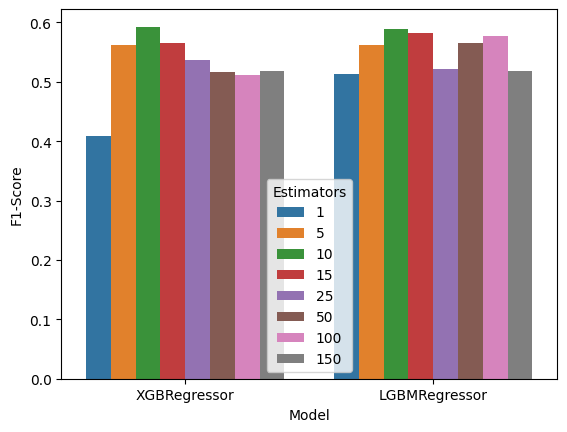

In [6]:
est = pd.read_csv("../results/tuning/boosting_estimators.csv", sep=";")
sns.barplot(x="Model", y=metric, hue="Estimators", data=est);

### Learning Rate

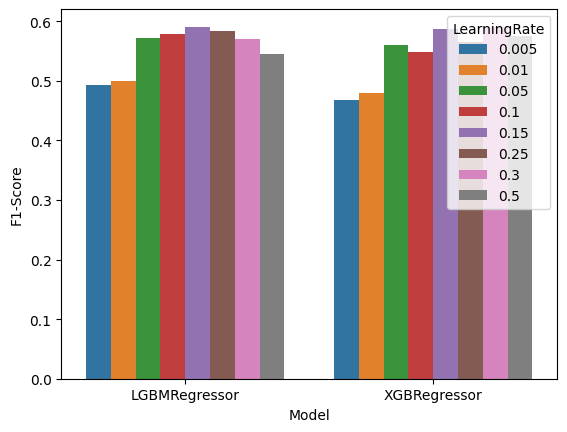

In [7]:
lr = pd.read_csv("../results/tuning/boosting_lr.csv", sep=";")
sns.barplot(x="Model", y=metric, hue="LearningRate", data=lr);

### Conclusion
- Set 'look_back_window' to 1300 (5 years; don't try to set it higher, as this would overly bias results by narrowing the range of possible validations).
- Set 'lags' to [1,5] and dispense with 'lag_transforms'.
- Use 'gbdt' for LGBMRegressor and 'dart' for XGBRegressor.
- Set 'n_estimators' to 10.
- Set 'learning_rate' to 0.15.